In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compareProbabilityDensityOfAgesInCategory(full,subcat):
    fig,ax = plt.subplots()
    full['Age'].plot.kde(ax=ax,label="Full Data, Ages")
    full[full[subcat]==1.0]['Age'].plot.kde(ax=ax, label="{}, Ages".format(subcat))
    ax.set_ylabel('Probability')
    ax.legend()
    
    sub = full[full[subcat]==1.0]
    diff_mean = df['Age'].mean() - sub['Age'].mean()
    print("difference in age means: {}".format(diff_mean))
    diff_var = df['Age'].var() - sub['Age'].var()
    print("difference in age variances: {}".format(diff_var))

In [3]:
df = pd.read_csv('./data/train.csv') # training data from CheXpert-v1.0-small
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


difference in age means: 9.502321338406198
difference in age variances: 4.232494189332101


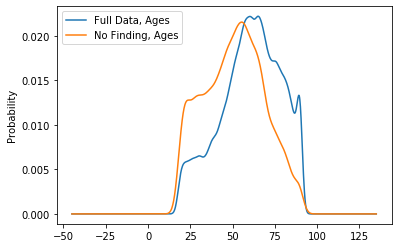

In [4]:
# investigate subset where there was no finding
compareProbabilityDensityOfAgesInCategory(df,'No Finding')

difference in age means: 3.8649911268872046
difference in age variances: -9.828751656942188


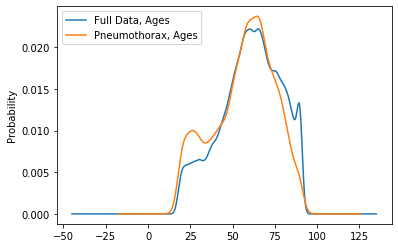

In [5]:
# investigate subset where there was pneumothorax
compareProbabilityDensityOfAgesInCategory(df,'Pneumothorax')

difference in age means: -0.9277536738612469
difference in age variances: -24.549256473406274


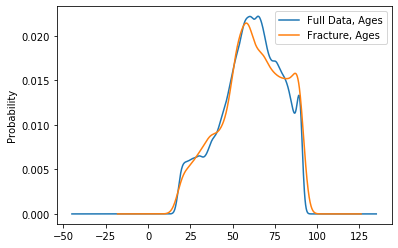

In [6]:
# investigate subset where there was fracture
compareProbabilityDensityOfAgesInCategory(df,'Fracture')

In [10]:
path = df['Path'].str.split('/',expand=True)
path.head()

,0,1,2,3,4
0,CheXpert-v1.0-small,train,patient00001,study1,view1_frontal.jpg
1,CheXpert-v1.0-small,train,patient00002,study2,view1_frontal.jpg
2,CheXpert-v1.0-small,train,patient00002,study1,view1_frontal.jpg
3,CheXpert-v1.0-small,train,patient00002,study1,view2_lateral.jpg
4,CheXpert-v1.0-small,train,patient00003,study1,view1_frontal.jpg


In [31]:
patient_studies = path[2].map(lambda x: x.lstrip('patient'))

MemoryError: 